# FINANCIAL DERIVATIVE - SOLANA CALL OPTION

In [1]:
pip install yfinance

  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Found existing installation: lxml 4.3.2
    Uninstalling lxml-4.3.2:
      Successfully uninstalled lxml-4.3.2
Note: you may need to restart the kernel to use updated packages.


### Import Data and Analysis Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [2]:
data = yf.download('SOL-USD', start='2020-11-12', end='2022-11-12')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-12,2.002125,2.050298,1.831728,1.899138,1.899138,11506048
2020-11-13,1.899138,2.061116,1.899138,2.020792,2.020792,11621744
2020-11-14,2.020792,2.033491,1.875279,1.917016,1.917016,8134593
2020-11-15,1.917016,2.209059,1.916848,2.043234,2.043234,18621333
2020-11-16,2.043234,2.360211,1.994853,2.255355,2.255355,22156135


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-07,32.678947,33.067505,28.926735,29.601345,29.601345,2545092967
2022-11-08,29.597441,31.060968,21.783983,24.152937,24.152937,6120104231
2022-11-09,24.159435,24.159435,12.505624,13.940857,13.940857,4647808136
2022-11-10,13.985069,18.675638,13.411027,17.681408,17.681408,4084381465
2022-11-11,17.663450,18.136482,15.507472,16.326746,16.326746,2191908978


In [6]:
Solana =  data['Adj Close']


### Plot of Solana Movement over 2 years

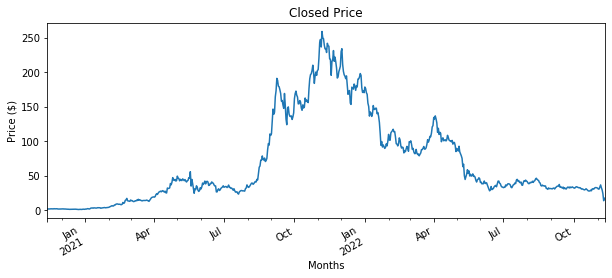

In [15]:
#Plot of Price Movement for Solana Coin
Solana.plot(figsize=(10, 4), subplots=True)
plt.xlabel('Months')
plt.ylabel('Price ($)')
plt.title('Closed Price');

In [8]:
#descriptive Statistics
Solana.describe().round(2)

count    730.00
mean      68.25
std       62.87
min        1.21
25%       28.54
50%       39.44
75%      101.12
max      258.93
Name: Adj Close, dtype: float64

In [12]:
#Log Returns
rets = np.log(Solana / Solana.shift(1))
rets.head().round(4)

Date
2020-11-12       NaN
2020-11-13    0.0621
2020-11-14   -0.0527
2020-11-15    0.0638
2020-11-16    0.0988
Name: Adj Close, dtype: float64

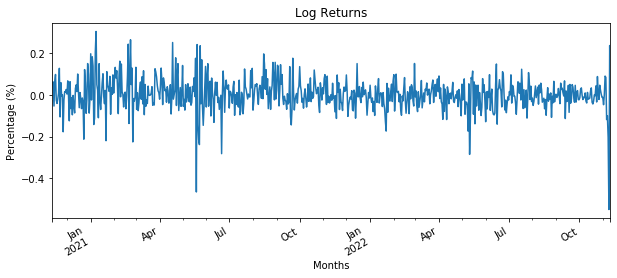

In [16]:
#Plot of Log returns for Solana Coin
rets.plot(figsize=(10, 4), subplots=True)
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.title('Log Returns');

In [11]:
# 3 months Solana Data
new_solana = Solana[-92:-1]

In [17]:
# 3 months Log Returns
retss = np.log(new_solana / new_solana.shift(1))
retss.head().round(4)

Date
2022-08-12       NaN
2022-08-13    0.0251
2022-08-14   -0.0343
2022-08-15   -0.0246
2022-08-16   -0.0153
Name: Adj Close, dtype: float64

In [18]:
#Implied Volatility
vol = np.sqrt(365) * retss.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 149.78 %


In [22]:
#Spot Price
Sp = new_solana[-1]
print('The Spot Price is', round(Sp,2),)

The Spot Price is 17.68


### Methodology for Solana Option Price

#### Monte Carlo Simulation for Pricing

In [ ]:
S0 = 17.68               # spot price
K = 16.68                # strike
T = 0.25                 # maturity 
r = 0.037                # risk free rate 
sigma = 1.50             # diffusion coefficient or volatility

In [66]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [67]:
S = mcs_simulation_np(90,10000)

In [68]:
S = np.transpose(S)
S

array([[17.68      , 18.60479607, 19.65327062, ..., 14.04695842,
        15.57058335, 13.8847716 ],
       [17.68      , 15.88671158, 16.13937516, ..., 18.90437207,
        19.61222507, 16.69303266],
       [17.68      , 18.64669521, 18.7267534 , ..., 11.37324055,
        12.97071573, 12.13394831],
       ...,
       [17.68      , 19.13831273, 19.75127124, ...,  5.17015915,
         5.22835249,  5.64412463],
       [17.68      , 18.46147952, 19.57427696, ..., 36.25462452,
        34.88749666, 30.67148594],
       [17.68      , 16.26206031, 17.95659085, ..., 13.03081267,
        13.62423253, 12.96691803]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

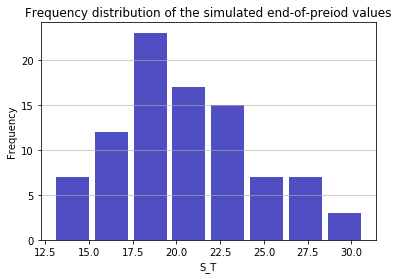

In [69]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [70]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('Vanilla call', str(c))

Vanilla call 5.731305270791841


#### Black-Scholes Model for Pricing

In [36]:
def vanilla_option_bs(S0, K, T, r, vol, payoff):
    #S0: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #sigma: volatility of Solana
    #payoff: call
    
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = S0 * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S0 * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [38]:
vanilla_option_bs(17.68, 16.68, 0.25, 0.037, 1.50, 'call')

5.596014955204706

In [45]:
S0 = np.linspace(3,33,11)
cp = np.zeros((len(S0),1))
for i in range(len(S0)):
    cp[i] = vanilla_option_bs(S0[i], 16.68, 0.25, 0.037, 1.50, 'call')

### Greeks

##### Delta

In [84]:
from mpl_toolkits.mplot3d import Axes3D

In [85]:
def delta(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [117]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40)
Delta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Delta[i,j] = delta(S0[j], 16.68, T[i], 0.037, 0.0, 1.50, 'call')

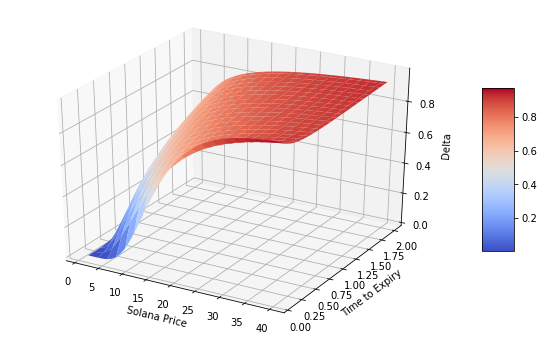

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [89]:
d = delta(17.68, 16.68, 0.25, 0.037, 0.0, 1.50, 'call')
print('The value of Delta is', d.round(4),'.','If the price of solana increases by 1 dollar, then the value of the vanilla option will increase $', d.round(4), '.')

The value of Delta is 0.679 . If the price of solana increases by 1 dollar, then the value of the vanilla option will increase $ 0.679 .


##### Gamma

In [121]:
def gamma(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (sigma * S0 * np.sqrt(T))
    
    return gamma

In [122]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40)
Gamma = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S0[j], 16.68, T[i], 0.037, 0.0, 1.50, 'call')

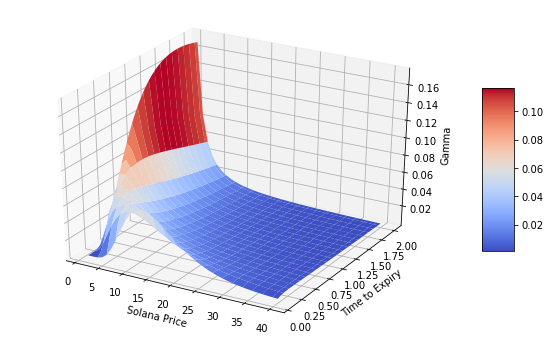

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [123]:
g = gamma(17.68, 16.68, 0.25, 0.037, 0.0, 1.50, 'call')
print('The value of gamma is', g.round(4),'.','When solana increases by 1 dollar, then delta increases by the rate of', g.round(4), '.')

The value of gamma is 0.0268 . When solana increases by 1 dollar, then delta increases by the rate of 0.0268 .


##### Speed

In [128]:
def speed(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((sigma **2) * (S0**2) * np.sqrt(T)) * (d1 + sigma * np.sqrt(T))
    
    return speed

In [129]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40)
Speed = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Speed[i,j] = speed(S0[j], 16.68, T[i], 0.037, 0.0, 1.50, 'call')

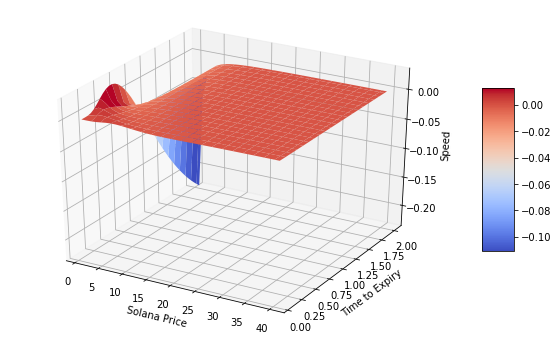

In [130]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [132]:
spe = speed(17.68, 16.68, 0.25, 0.037, 0.0, 1.50, 'call')
print('The value of speed is', spe.round(4),'.','When solana increases by 1 dollar, then gamma decreases by the rate of', spe.round(4), '.')

The value of speed is -0.0012 . When solana increases by 1 dollar, then gamma decreases by the rate of -0.0012 .


##### Theta

In [133]:
def theta(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        theta = sigma * S0 * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S0 * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = sigma * S0 * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S0 * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [134]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40) 
Theta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Theta[i,j] = theta(S0[j], 16.68, T[i], 0.037, 0.0, 1.5, 'call')

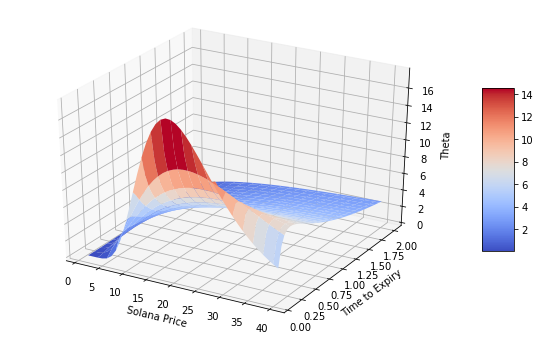

In [135]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [140]:
th = theta(17.68, 16.68, 0.25, 0.037, 0.0, 1.50, 'call')
print('The value of Theta is', th.round(4),'.',)

The value of Theta is 9.7331 .


In [146]:
print('If time to maturity increased by one week, the value of option increases by $ ', th.round(4)/52 , 'provided other conditions remain the same, only time changes', '.')

If time to maturity increased by one week, the value of option increases by $  0.187175 provided other conditions remain the same, only time changes .


##### Rho

In [147]:
def rho(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [149]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40)
Rho = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Rho[i,j] = rho(S0[j], 16.68, T[i], 0.037, 0.0, 1.50, 'call')

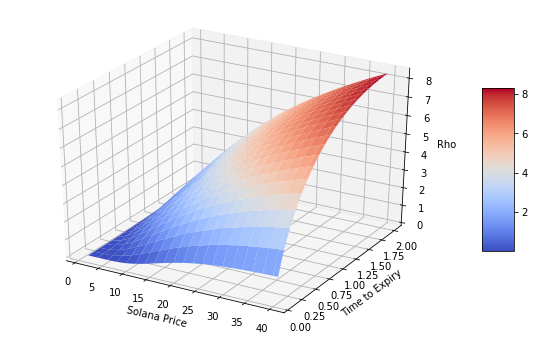

In [155]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [151]:
rh = rho(17.68, 16.68, 0.25, 0.037, 0.0, 1.50, 'call')
rh

1.6022721602589105

In [152]:
print('If risk free rate increased by one percent, the value of option will increases by $ ', rh.round(4)/100 , 'provided other conditions remain the same, only rate changes', '.')

If risk free rate increased by one percent, the value of option will increases by $  0.016023 provided other conditions remain the same, only rate changes .


##### Vega

In [153]:
def vega(S0, K, T, r, q, sigma, payoff):
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S0 * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [157]:
S0 = np.linspace(1, 40, 40)
T = np.linspace(0.08, 2, 40)
Vega = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Vega[i,j] = vega(S0[j], 16.68, T[i], 0.037, 0.0, 1.50, 'call')

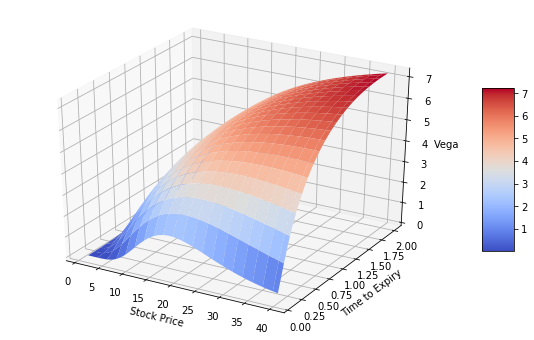

In [158]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
v = vega(17.68, 16.68, 1, 0.04, 0.02, 0.3, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')